# HCIP calculation

## Gross rock volume

In [1]:
thick = 80            # metres
area = 20000 * 30000  # metres

grv = thick * area
grv

48000000000

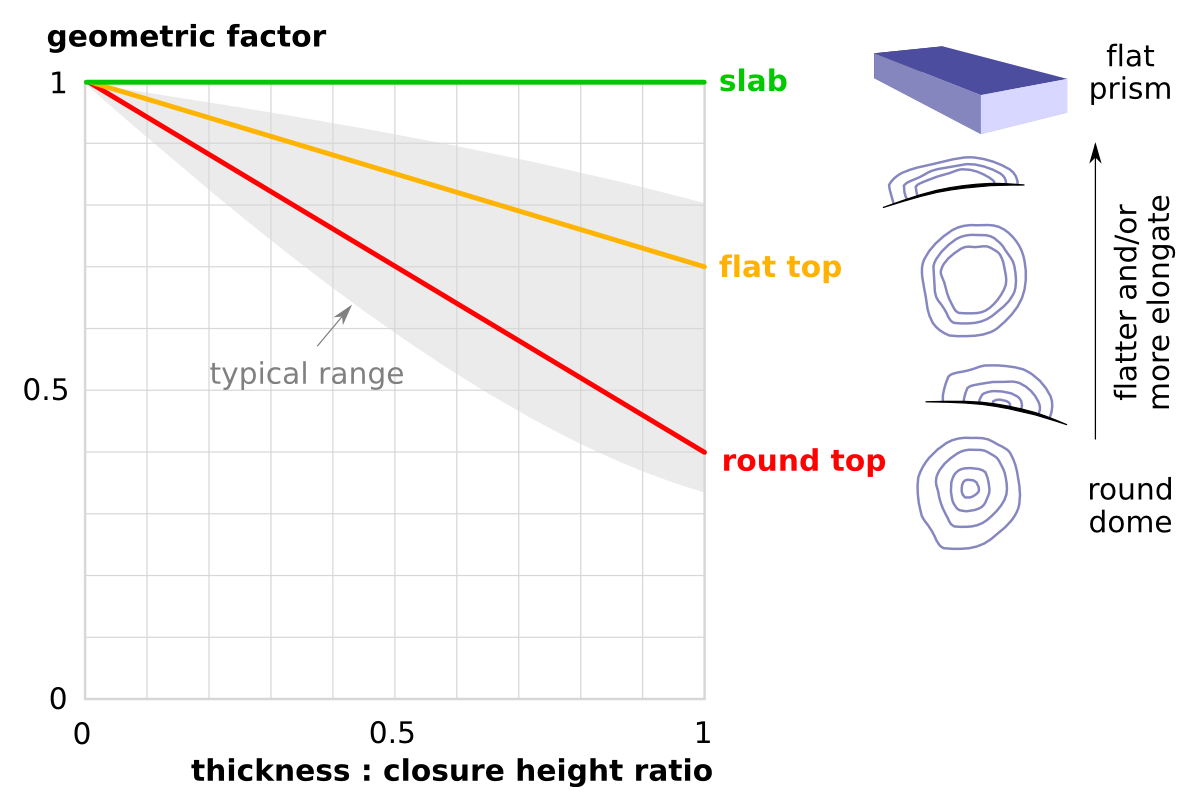

In [2]:
from IPython import display
display.Image("http://subsurfwiki.org/images/6/66/Geometric_correction_factor.png", width=600)

In [3]:
height = 100
ratio = thick / height

top = 'slab'

if top == 'round':
    g = -0.6 * ratio + 1
elif top == 'flat':
    g = -0.3 * ratio + 1
else:
    g = 1

g

1

In [4]:
grv *= g

## HC pore volume

In [5]:
netg = 0.5   # fraction
por = 0.24   # fraction
s_o = 0.8    # fraction

hcpv = netg * por * s_o

## Formation volume factor

Oil shrinks when we produce it, especially if it has high GOR. The FVF, or $B_O$, is the ratio of a reservoir barrel to a stock-tank barrel (25 deg C and 1 atm). Typically the FVF is between 1 (heavy oil) and 1.7 (high GOR).

For gas, $B_G$ is 0.3495ZT/P, where Z is the Z factor.

In [6]:
fvf = 1.1

## Put it all together

In [7]:
hcip = grv * hcpv / fvf
hcip

4189090909.0909085

In [8]:
print("HCIP", hcip)

HCIP 4189090909.0909085


[For more on conversion to bbl, BOE, etc.](https://en.wikipedia.org/wiki/Barrel_of_oil_equivalent)

In [9]:
print("HCIP is {:.0f} Mm³ or {:.0f} million bbl".format(hcip/1000000, 6.29*hcip/1000000))

HCIP is 4189 Mm³ or 26349 million bbl


# Risk

## Single prospect

In [10]:
p_src = 0.5
p_mig = 0.25
p_trap = 0.75
p_res = 0.5

In [11]:
p_disc = p_src * p_mig * p_trap * p_res

In [12]:
p_disc

0.046875

In [13]:
expect = p_disc * hcip

In [14]:
print("Expectation is {:.0f} Mm³ or {:.0f} million bbl".format(expect/1000000, 6.29*expect/1000000))

Expectation is 196 Mm³ or 1235 million bbl


## Another prospect

In [15]:
p_a = p_disc
p_b = 0.10

In [16]:
p_both = p_a * p_b
p_both

0.004687500000000001

In [17]:
p_one = 1 - (1 - p_a) * (1 - p_b)
p_one

0.14218750000000002

# Reward

We'd like to get the latest oil price. We can use Yahoo Finance. First we build a query:

In [18]:
import requests

symbol = 'CLF17.NYM'
url = "http://download.finance.yahoo.com/d/quotes.csv"
params = {'s': symbol, 'f': 'l1'}

r = requests.get(url, params=params)

In [19]:
try:
    price = float(r.text)
except ValueError as e:
    print("Error: ", e, r.text)
    
price

48.02

In [20]:
reward = 6.29 * expect * price

In [21]:
reward

59310811636.36363

In [22]:
print("We should make ${:.2f} billion.".format(reward/10e9))

We should make $5.93 billion.


<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2016</p>
</div>